In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-data/student_data.csv


In [2]:
"""Student Performance Data was obtained in a survey of students' math course in secondary school.
It consists of 33 Column
Dataset Contains Features like
gender, age, size of family, Father education, Mother education, 
Occupation of Father and Mother, Family Relation, Health, and Grades
This dataset can be used for Regression (as target variable Grade)
as well as Analysis tasks. it might contain imbalanced category features"""

"Student Performance Data was obtained in a survey of students' math course in secondary school.\nIt consists of 33 Column\nDataset Contains Features like\ngender, age, size of family, Father education, Mother education, \nOccupation of Father and Mother, Family Relation, Health, and Grades\nThis dataset can be used for Regression (as target variable Grade)\nas well as Analysis tasks. it might contain imbalanced category features"

In [3]:
"""Dalc means daily alcohol consumption and Walc means weekly alcohol consumption
And family relations is mapped into valu between 1 to 5

Here, Grades are evaluated in USA grading system
This dataset contains numerical values for corresponding grade.
Like, 19 means A++ and 0 means F-grade
and so, on
For taking Average, grades are converted into corresponding numerical values

It (medu & fedu) represents Level of Education (as like we do in user feedback)
Here 1 means lower level of education
And 5 means higest level of education
Here 1 means no education
2 means elementary school education
3 means middle school education
4 means secondary school education"""

'Dalc means daily alcohol consumption and Walc means weekly alcohol consumption\nAnd family relations is mapped into valu between 1 to 5\n\nHere, Grades are evaluated in USA grading system\nThis dataset contains numerical values for corresponding grade.\nLike, 19 means A++ and 0 means F-grade\nand so, on\nFor taking Average, grades are converted into corresponding numerical values\n\nIt (medu & fedu) represents Level of Education (as like we do in user feedback)\nHere 1 means lower level of education\nAnd 5 means higest level of education\nHere 1 means no education\n2 means elementary school education\n3 means middle school education\n4 means secondary school education'

In [4]:
student=pd.read_csv("../input/student-performance-data/student_data.csv")
df=student.copy()

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [6]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [7]:
pd.reset_option('display.max_columns', None)
pd.reset_option('display.max_rows', None)

In [8]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [9]:
df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [10]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [11]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [13]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [14]:
df.shape

(395, 33)

In [15]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [17]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395.0,NaN,NaN,NaN,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395.0,NaN,NaN,NaN,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,NaN,NaN,NaN,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Examination of missing values

In [18]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [19]:
cat_df=df.select_dtypes(include=["object"])
cat_df

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [20]:
#Columns Unique Values

print("school:",cat_df.school.unique())
print("sex:",cat_df.sex.unique())
print("address:",cat_df.address.unique())
print("famsize:",cat_df.famsize.unique())
print("Pstatus:",cat_df.Pstatus.unique())
print("Mjob:",cat_df.Mjob.unique())
print("Fjob:",cat_df.Fjob.unique())
print("reason:",cat_df.reason.unique())
print("guardian:",cat_df.guardian.unique())
print("schoolsup:",cat_df.schoolsup.unique())
print("famsup:",cat_df.famsup.unique())
print("paid:",cat_df.paid.unique())
print("activities:",cat_df.activities.unique())
print("nursery:",cat_df.nursery.unique())
print("higher:",cat_df.higher.unique())
print("internet:",cat_df.internet.unique())
print("romantic:",cat_df.romantic.unique())


school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


In [21]:
#Columns  Values Counts
print("school:",cat_df.school.value_counts())
print("sex:",cat_df.sex.value_counts())
print("address:",cat_df.address.value_counts())
print("famsize:",cat_df.famsize.value_counts())
print("Pstatus:",cat_df.Pstatus.value_counts())
print("Mjob:",cat_df.Mjob.value_counts())
print("Fjob:",cat_df.Fjob.value_counts())
print("reason:",cat_df.reason.value_counts())
print("guardian:",cat_df.guardian.value_counts())
print("schoolsup:",cat_df.schoolsup.value_counts())
print("famsup:",cat_df.famsup.value_counts())
print("paid:",cat_df.paid.value_counts())
print("activities:",cat_df.activities.value_counts())
print("nursery:",cat_df.nursery.value_counts())
print("higher:",cat_df.higher.value_counts())
print("internet:",cat_df.internet.value_counts())
print("romantic:",cat_df.romantic.value_counts())

school: GP    349
MS     46
Name: school, dtype: int64
sex: F    208
M    187
Name: sex, dtype: int64
address: U    307
R     88
Name: address, dtype: int64
famsize: GT3    281
LE3    114
Name: famsize, dtype: int64
Pstatus: T    354
A     41
Name: Pstatus, dtype: int64
Mjob: other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
Fjob: other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
reason: course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
guardian: mother    273
father     90
other      32
Name: guardian, dtype: int64
schoolsup: no     344
yes     51
Name: schoolsup, dtype: int64
famsup: yes    242
no     153
Name: famsup, dtype: int64
paid: no     214
yes    181
Name: paid, dtype: int64
activities: yes    201
no     194
Name: activities, dtype: int64
nursery: yes    314
no      81
Name: nursery, dtype: int64
higher: yes    375
no 

AxesSubplot(0.125,0.125;0.775x0.755)


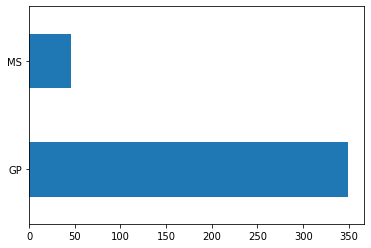

In [22]:
print(cat_df.school.value_counts().plot.barh())

In [23]:
cat_df.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

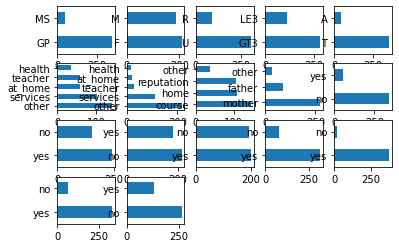

In [24]:
for i,name in enumerate(list(cat_df.columns)):
    plt.subplot(4,5,i+1)
    cat_df[f"{name}"].value_counts().plot.barh()


In [25]:
"""fig,ax=plt.subplots(3)
for i,name in enumerate(list(cat_df.columns)):
    ax[i].plot(cat_df[f"{name}"].value_counts())"""

'fig,ax=plt.subplots(3)\nfor i,name in enumerate(list(cat_df.columns)):\n    ax[i].plot(cat_df[f"{name}"].value_counts())'

In [26]:
df['G_final'] = ((df['G1'] + df['G2'] + df['G3']) / 3).round(2)

In [27]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_final
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.67
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.33
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.33
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.67
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,9.00
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,15.33
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,8.33
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,11.00


In [28]:
#Numeric Values
num_df=df.select_dtypes(include="int64")
num_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [29]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [30]:
def descfunc(name):
    print(f"Describe of {name} ")
    print("-"*40)
    print("Mean: "+str(num_df[f"{name}"].mean()))
    print("Count: "+str(num_df[f"{name}"].count()))
    print("Maximum: "+str(num_df[f"{name}"].max()))
    print("Minimum: "+str(num_df[f"{name}"].min()))
    print("Median: "+str(num_df[f"{name}"].median()))
    print("Standard Deviation: "+str(num_df[f"{name}"].std()))
    print("-"*40)
    

In [31]:
import plotly.express as px
fig = px.box(data_frame = df, y = ['G1', 'G2', 'G3', 'G_final'],
            template = 'plotly_dark')

fig.update_layout(
    title = {
        'text': "Box-plots Notes"},
    xaxis_title = 'Notes',
    yaxis_title = 'Values',
    width = 1200,
    height = 500,
    font_family="Arial",
    font_color="White",
    title_font_family="Arial",
    title_font_color= "White")

fig.show()

In [32]:
descfunc("age")

Describe of age 
----------------------------------------
Mean: 16.696202531645568
Count: 395
Maximum: 22
Minimum: 15
Median: 17.0
Standard Deviation: 1.2760427246056283
----------------------------------------


In [33]:
for name in list(num_df.columns):
    descfunc(f"{name}")

Describe of age 
----------------------------------------
Mean: 16.696202531645568
Count: 395
Maximum: 22
Minimum: 15
Median: 17.0
Standard Deviation: 1.2760427246056283
----------------------------------------
Describe of Medu 
----------------------------------------
Mean: 2.749367088607595
Count: 395
Maximum: 4
Minimum: 0
Median: 3.0
Standard Deviation: 1.0947351414285367
----------------------------------------
Describe of Fedu 
----------------------------------------
Mean: 2.5215189873417723
Count: 395
Maximum: 4
Minimum: 0
Median: 2.0
Standard Deviation: 1.088200545826944
----------------------------------------
Describe of traveltime 
----------------------------------------
Mean: 1.4481012658227848
Count: 395
Maximum: 4
Minimum: 1
Median: 1.0
Standard Deviation: 0.6975047549086825
----------------------------------------
Describe of studytime 
----------------------------------------
Mean: 2.0354430379746837
Count: 395
Maximum: 4
Minimum: 1
Median: 2.0
Standard Deviation: 0.83

In [34]:
df1 = df.groupby(by = 'freetime').agg({'G_final':'mean', 'G1':'mean', 'G2':'mean', 'G3':'mean'}).reset_index()
df1.sort_values(by = 'G_final')

,freetime,G_final,G1,G2,G3
0,1,10.141053,10.157895,10.421053,9.842105
2,3,10.144268,10.369427,10.280255,9.783439
3,4,10.608435,10.834783,10.565217,10.426087
4,5,11.475000,11.775000,11.350000,11.300000
1,2,11.780625,12.046875,11.734375,11.562500


In [35]:
fig = px.bar(data_frame = df1,
             x = 'freetime', y = 'G_final',
             text_auto = '.3s', template = 'plotly_dark')

fig.update_layout(
    title = {
        'text': "Notes by Freetime"},
    xaxis_title = 'Freetime',
    yaxis_title = 'Notes',
    width = 1200,
    height = 500,
    font_family = "Arial",
    font_color = "White",
    font = dict(size = 18),
    title_font_family = "Arial",
    title_font_color = "White")

fig.update_traces(textposition = "outside", textfont_size = 16, cliponaxis = True)

fig.show()

In [36]:
df2 = df.groupby(by = 'sex').agg({'G1':'mean',
                            'G2':'mean',
                            'G3':'mean',
                            'G_final':'mean'}).reset_index().sort_values(by = ['G_final', 'G1', 'G2', 'G3'],
                                                                        ascending = False)
df2

,sex,G1,G2,G3,G_final
1,M,11.229947,11.074866,10.914439,11.073048
0,F,10.620192,10.389423,9.966346,10.325000


In [37]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
fig = make_subplots(rows = 2, cols = 2)

fig = make_subplots(rows = 2,
                    cols = 2,
                    subplot_titles = [
                        'G1',  # 1. Title first note
                        'G2',# 2. Title second note
                        'G3',   # 3. Title third note
                        'G average', #  4. Title average note
])

# Adiciona o primeiro grafico e especifica a linha e a coluna
fig.add_trace(go.Bar(x = df2['sex'], 
                     y = df2['G1'], textposition='auto',
                     name = 'G1'), row = 1, col = 1)

# adiciona o segundo gráfico
fig.add_trace(go.Bar(x = df2['sex'], 
                     y = df2['G2'], textposition='auto',
                     name = 'G2'), row = 1, col = 2)

# adiciona o terceiro gráfico
fig.add_trace(go.Bar(x = df2['sex'], 
                     y = df2['G3'], textposition='auto',
                     name = 'G3'), row = 2, col = 1)

# adiciona o quarto gráfico
fig.add_trace(go.Bar(x = df2['sex'], 
                     y = df2['G_final'], textposition='auto',
                     name = 'G average'), row = 2, col = 2)

# Update xaxis propriedades
fig.update_xaxes(title_text = "Sex", row=1, col=1)
fig.update_xaxes(title_text = "Sex", row=1, col=2)
fig.update_xaxes(title_text = "Sex", row=2, col=1)
fig.update_xaxes(title_text = "Sex", row=2, col=2)

# Update yaxis propriedades
fig.update_yaxes(title_text = "Note G1", row=1, col=1)
fig.update_yaxes(title_text = "Note G2", row=1, col=2)
fig.update_yaxes(title_text = "Note G3", row=2, col=1)
fig.update_yaxes(title_text = "Note G average", row=2, col=2)

fig.update_layout(title = 'Note by Sex', title_x = 0.5)

In [38]:
df3 = df.groupby(by = 'guardian').agg({'G1':'mean',
                            'G2':'mean',
                            'G3':'mean',
                            'G_final':'mean'}).reset_index().sort_values(by = ['G_final', 'G1', 'G2', 'G3'],
                                                                        ascending = False)
df3

,guardian,G1,G2,G3,G_final
0,father,11.111111,11.155556,10.688889,10.985111
1,mother,10.882784,10.677656,10.483516,10.681062
2,other,10.562500,9.781250,9.062500,9.802188


In [39]:
df4 = df.groupby(by = 'absences').agg({'G1':'mean',
                            'G2':'mean',
                            'G3':'mean',
                            'G_final':'mean'}).reset_index().sort_values(by = ['absences'])
df4

,absences,G1,G2,G3,G_final
0,0,10.547826,9.886957,8.443478,9.626174
1,1,12.333333,12.666667,13.000000,12.666667
2,2,11.630769,11.800000,11.907692,11.779385
3,3,11.500000,11.500000,11.500000,11.500000
4,4,10.830189,11.113208,11.283019,11.075094
5,5,11.200000,11.000000,11.600000,11.268000
6,6,10.838710,11.419355,11.774194,11.344194
7,7,11.428571,11.285714,11.857143,11.522857
8,8,10.863636,10.454545,10.590909,10.636364
9,9,13.333333,12.666667,13.333333,13.110000


In [40]:
fig = px.bar(data_frame = df4,
             x = 'absences', y = 'G_final',
             text_auto = '.3s', template = 'plotly_dark')

fig.update_layout(
    title = {
        'text': "Average Notes by Absence"},
    xaxis_title = 'Absence',
    yaxis_title = 'Note',
    width = 1200,
    height = 500,
    font_family = "Arial",
    font_color = "White",
    title_font_family = "Arial",
    title_font_color = "White")

fig.update_traces(textposition="outside", textfont_size = 18, cliponaxis=True)

fig.show()

In [41]:
df4_plot = df4[df4['G_final'] > df4['G_final'].mean()].sort_values(by = 'G_final',
                                                       ascending = False)
df4_plot

,absences,G1,G2,G3,G_final
24,24,18.000000,18.000000,18.000000,18.000000
21,21,17.000000,18.000000,18.000000,17.670000
9,9,13.333333,12.666667,13.333333,13.110000
23,23,13.000000,13.000000,13.000000,13.000000
1,1,12.333333,12.666667,13.000000,12.666667
13,13,11.666667,11.666667,12.666667,12.000000
11,11,12.333333,11.666667,11.666667,11.886667
20,20,12.750000,11.250000,11.500000,11.832500
2,2,11.630769,11.800000,11.907692,11.779385
30,40,13.000000,11.000000,11.000000,11.670000


In [42]:
fig = px.bar(data_frame = df4_plot,
             x = 'absences', y = 'G_final',
             text_auto = '.3s', template = 'plotly_dark')

fig.update_layout(
    title = {
        'text': "Average Notes by Absence"},
    xaxis_title = 'Absence',
    yaxis_title = 'Note',
    width = 1200,
    height = 500,
    font_family = "Arial",
    font_color = "White",
    font = dict(size = 18),
    title_font_family = "Arial",
    title_font_color = "White")

fig.update_traces(textposition="outside", textfont_size = 16, cliponaxis=True)

fig.show()

In [43]:
# criando coluna auxiliar para realizar contagens
df['count'] = 1

In [44]:
df5 = df.groupby(by = ['Fjob']).agg({'count':'count'}).reset_index().sort_values(by = 'count',
                                                                          ascending = False)
df5['percent'] = ((df5['count'] / df5['count'].sum())*100).round(2)
df5

,Fjob,count,percent
2,other,217,54.94
3,services,111,28.10
4,teacher,29,7.34
0,at_home,20,5.06
1,health,18,4.56


In [45]:
#df5['percent'] = df5['percent'].apply(lambda x: '{0:1.2f}%'.format(x))

In [46]:
df5 = df5.reindex([3, 4, 1, 0, 2])
df5

,Fjob,count,percent
3,services,111,28.10
4,teacher,29,7.34
1,health,18,4.56
0,at_home,20,5.06
2,other,217,54.94


In [47]:
df5['Fjob'] = df5['Fjob'].apply(lambda x: 'Services' if x == 'services' else
                            'Teacher' if x == 'teacher' else
                            'Health' if x == 'health' else
                            'At Home' if x == 'at_home' else
                            'Others')
df5

,Fjob,count,percent
3,Services,111,28.10
4,Teacher,29,7.34
1,Health,18,4.56
0,At Home,20,5.06
2,Others,217,54.94


In [48]:
fig = px.bar(data_frame = df5,
             x = 'Fjob', y = 'count',
             text_auto = True, template = 'plotly_dark')

fig.update_layout(
    title = {
        'text': 'Types of works'},
    xaxis_title = 'Work',
    yaxis_title = 'number of Parents',
    width = 1200,
    height = 500,
    font_family = "Arial",
    font = dict(size = 18),
    font_color = "White",
    title_font_family = "Arial",
    title_font_color = "White")

fig.update_traces(textposition="outside", textfont_size = 16, cliponaxis=True)

fig.show()

In [49]:
df6 = df.groupby(by = ['Mjob']).agg({'count':'count'}).reset_index().sort_values(by = 'count',
                                                                          ascending = False)
df6

,Mjob,count
2,other,141
3,services,103
0,at_home,59
4,teacher,58
1,health,34


In [50]:
fig1 = px.histogram(data_frame = df,
             x = 'G1', nbins = 25, template = 'plotly_dark')

fig2 = px.histogram(data_frame = df,
             x = 'G2', nbins = 25, template = 'plotly_dark')

fig3 = px.histogram(data_frame = df,
             x = 'G3', nbins = 25, template = 'plotly_dark')

fig1.update_layout(
    title = {
        'text': "First Note (G1)"},
    xaxis_title = 'Note',
    yaxis_title = 'Frequency',
    width = 1000,
    height = 500,
    font_family="Arial",
    font_color="White",
    font = dict(size = 18),
    title_font_family="Arial",
    title_font_color= "White",
    legend_title_font_color = "green")

fig1.update_traces(textposition="outside", textfont_size = 16, cliponaxis=True)

fig2.update_layout(
    title = {
        'text': "Second Note (G2)"},
    xaxis_title = 'Note',
    yaxis_title = 'Frequency',
    width = 1000,
    height = 500,
    font_family="Arial",
    font_color="White",
    font = dict(size = 18),
    title_font_family="Arial",
    title_font_color= "White",
    legend_title_font_color = "green")

fig2.update_traces(textposition="outside", textfont_size = 16, cliponaxis=True)

fig3.update_layout(
    title = {
        'text': "Third Note (G3)"},
    xaxis_title = 'Note',
    yaxis_title = 'Frequency',
    width = 1000,
    height = 500,
    font_family="Arial",
    font_color="White",
    font = dict(size = 18),
    title_font_family="Arial",
    title_font_color= "White",
    legend_title_font_color = "green")

fig3.update_traces(textposition="outside", textfont_size = 16, cliponaxis=True)

fig1.show()
fig2.show()
fig3.show()

In [51]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G_final,count
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.67,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.33,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.33,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.67,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,4,5,4,11,9,9,9,9.00,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,3,14,16,16,15.33,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,3,10,8,7,8.33,1
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,3,4,5,0,11,12,10,11.00,1


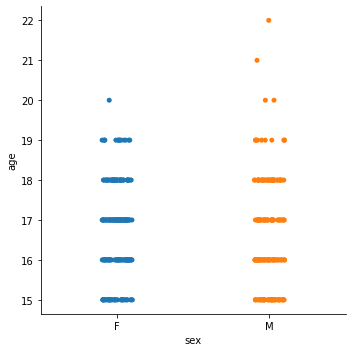

In [52]:
sns.catplot(x='sex',y='age',data=df)

In [53]:
df5

,Fjob,count,percent
3,Services,111,28.10
4,Teacher,29,7.34
1,Health,18,4.56
0,At Home,20,5.06
2,Others,217,54.94


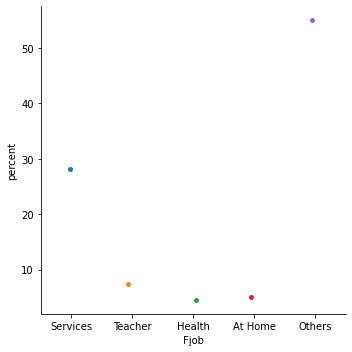

In [54]:
sns.catplot(x='Fjob',y='percent',data=df5)

<AxesSubplot:xlabel='Fjob', ylabel='G_final'>

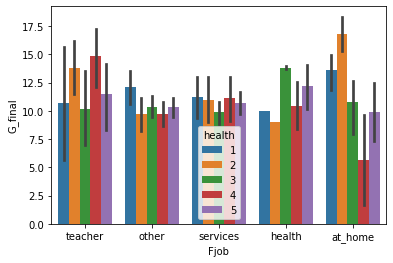

In [55]:
sns.barplot(x='Fjob',y='G_final',hue='health',data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='G_final'>

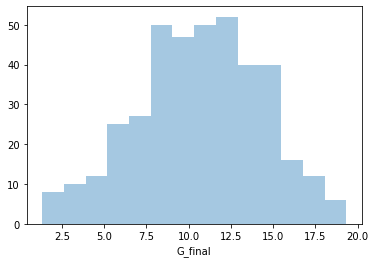

In [56]:
sns.distplot(df.G_final,kde=False)

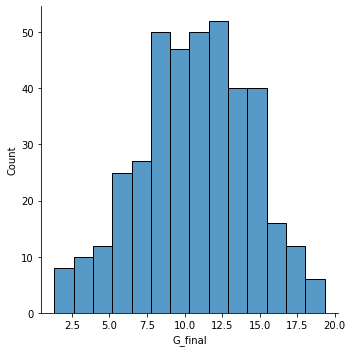

In [57]:
sns.displot(df.G_final,kde=False)

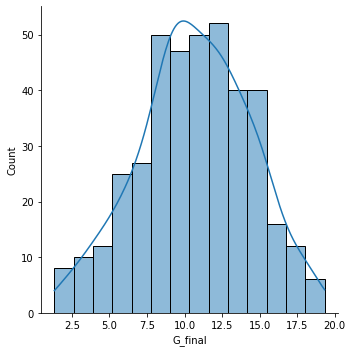

In [58]:
sns.displot(df.G_final,kde=True)

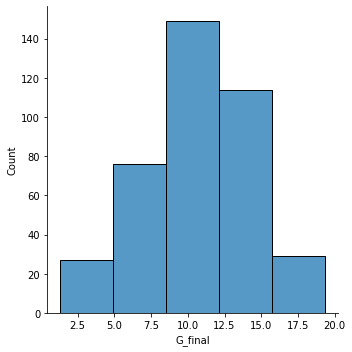

In [59]:
sns.displot(df.G_final,bins=5,kde=False)